https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/example_kaggle_salt.ipynb

<h2>Table of Contents:</h2>
        
        How to apply albumentations augmentations
        
        Blur Related Methods
        
        Noise Related Methods
        
        Cutout Related Methods
        
        Distortion Related Methods
        
        Brightness, contrast Related Methods
        
        Affine Related Methods
        
        Reference and further reading

In [28]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import albumentations as A
from PIL import Image

from albumentations import (
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    Compose,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomBrightnessContrast,    
    RandomGamma    
)

In [29]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [30]:
image = cv2.imread('256px-Grace_Hopper.jpg')
mask = cv2.imread('256px-Grace_Hopper.jpg', 0)

In [31]:
##Original image 

print(image.shape, mask.shape)

(300, 256, 3) (300, 256)


In [32]:
original_height, original_width = image.shape[:2]

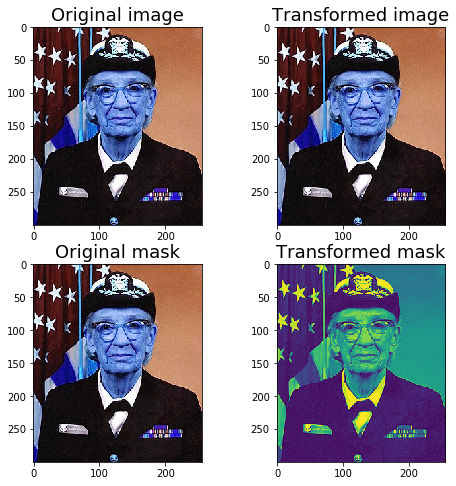

In [35]:
visualize(image, mask,image,image)

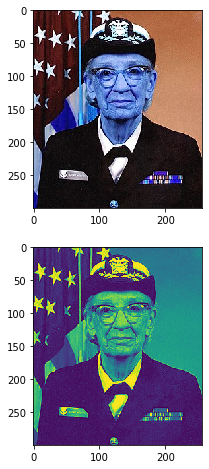

In [37]:
visualize(image, mask)

<h2>Padding</h2>

    UNet type architecture require input image size be divisible by 2^N, where N is th enumber of the maxpooling layers. In the vanilla UNet N=5 ==> we need to pad input images to the closest divisible by 2^5 = 32 number which is 128. This operation may be performed using PadIfNeeded transformation. Which pads both image and mask on all four sides. Padding type (zero, constant, reflection) may be specified. Default padding is reflection padding.

***`class`*** ***albumentations.augmentations.transforms.PadIfNeeded(min_height=1024, min_width=1024, border_mode=4, value=None, mask_value=None, always_apply=False, p=1.0)***

    Pad side of the image / max if side is less than desired number.

**Parameters:**	

        min_height (int) – minimal result image height.
        min_width (int) – minimal result image width.
        border_mode (OpenCV flag) – OpenCV border mode.
        value (int, float, list of int, lisft of float) – padding value if border_mode is cv2.BORDER_CONSTANT.
        (int, float, (mask_value) – list of int, lisft of float): padding value for mask if border_mode is cv2.BORDER_CONSTANT.
        p (float) – probability of applying the transform. Default: 1.0.

**`Targets:`**

    image, mask, bbox, keypoints

**`Image types:`**

    uint8, float32

(300, 256, 3) (300, 256)


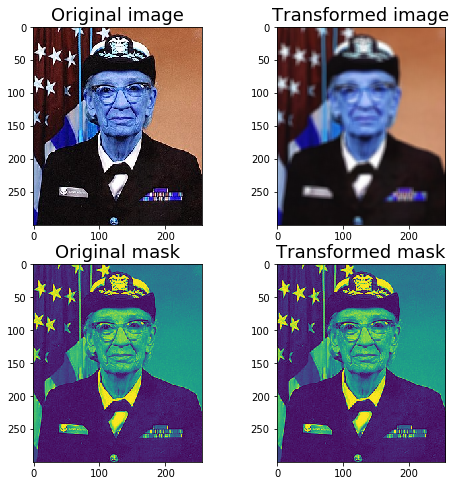

In [38]:
augmented = aug(image=image, mask=mask)

image_padded = augmented['image']
mask_padded = augmented['mask']

print(image_padded.shape, mask_padded.shape)

visualize(image_padded, mask_padded, original_image=image, original_mask=mask)